In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
b=pd.read_csv("/Users/teja/Downloads/C10_Loan1.csv")
b

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [52]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [53]:
b.describe()

,Annual Income
count,10.000000
mean,104.000000
std,45.631373
min,60.000000
25%,77.500000
50%,92.500000
75%,115.000000
max,220.000000


In [54]:
Home_Owner={"Home Owner":{"Yes":1,"No":0}}
b=b.replace(Home_Owner)
b

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,Single,125,No
1,0,Married,100,No
2,0,Single,70,No
3,1,Married,120,No
4,0,Divorced,95,Yes
5,0,Married,60,No
6,1,Divorced,220,No
7,0,Single,85,Yes
8,0,Married,75,No
9,0,Single,90,Yes


In [55]:
b["Home Owner"].value_counts()

0    7
1    3
Name: Home Owner, dtype: int64

In [56]:
c=b.drop(["Marital Status","Defaulted Borrower"],axis=1)

In [57]:
x=c.drop("Home Owner",axis=1)
y=b["Home Owner"]
b

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,Single,125,No
1,0,Married,100,No
2,0,Single,70,No
3,1,Married,120,No
4,0,Divorced,95,Yes
5,0,Married,60,No
6,1,Divorced,220,No
7,0,Single,85,Yes
8,0,Married,75,No
9,0,Single,90,Yes


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rf=RandomForestClassifier()

In [61]:
params={'max_depth':[1,2,3,4,5],
        'min_samples_leaf':[2,4,6,8,10],
        'n_estimators':[1,3,5,7]
    }

In [62]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [63]:
gs.best_score_

0.5

In [67]:
rf_best=gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=3)

[Text(0.5, 0.75, 'x[0] <= 110.0\ngini = 0.444\nsamples = 5\nvalue = [2, 4]\nclass = No'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]\nclass = No')]

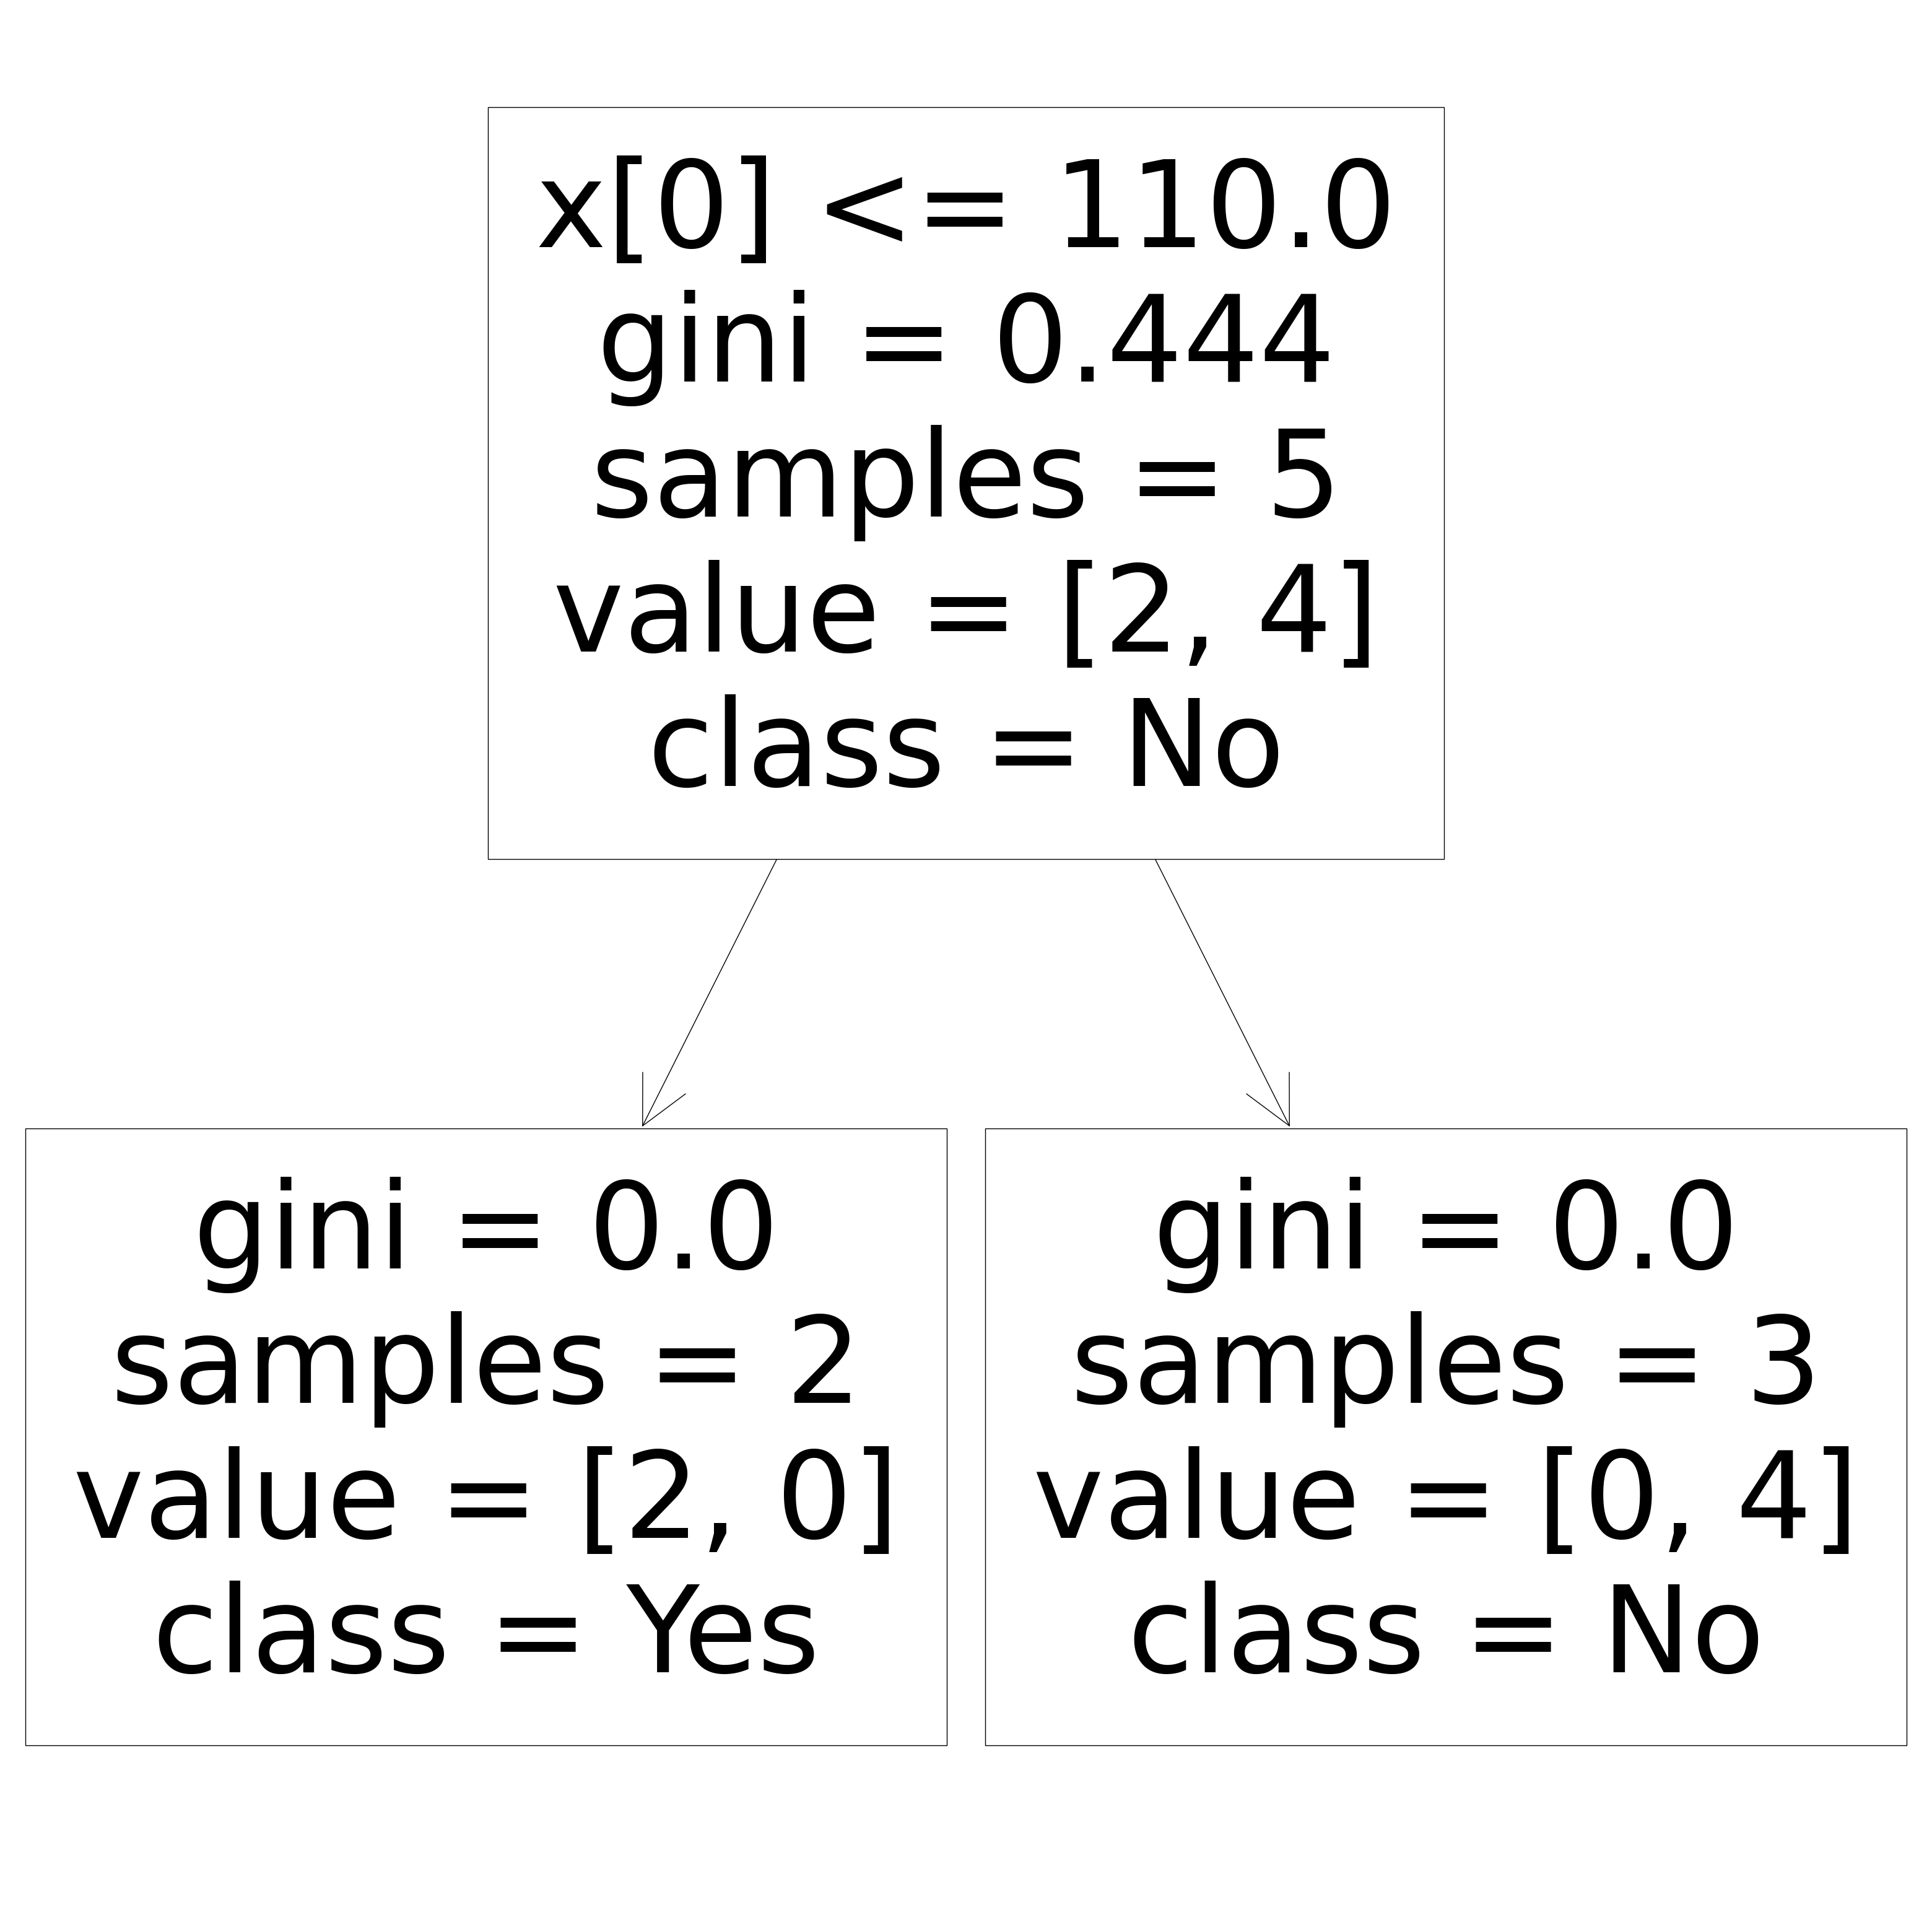

In [68]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[2],feature_names = None,class_names=['Yes','No'])

In [31]:
x1=pd.read_csv("/Users/teja/Downloads/C1_Ionosphere.csv")
x1

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [32]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

In [33]:
x1.describe()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471517,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335317,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816778,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
    x1["0.99539"].value_counts()

 1.00000    95
 0.00000    25
-1.00000    15
 0.60678     1
 0.89410     1
            ..
-0.65625     1
 0.85271     1
 0.90374     1
-0.20500     1
 0.84710     1
Name: 0.99539, Length: 218, dtype: int64

In [35]:
x1=x1.drop(['0.99539'],axis=1)
x1

,1,0,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,0.85243.1,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [36]:
a=x1.drop(['-0.05889'],axis=1)
b=x1['-0.05889']


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
rf=RandomForestClassifier()

In [42]:
params={'max_depth':[1,2,3,4,5],
        'min_samples_leaf':[2,4,6,8,10],
        'n_estimators':[1,3,5,7]
    }

In [43]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

/Users/teja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [44]:
gs.best_score_

0.8333333333333333

In [45]:
rf_best=gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=1)

[Text(0.5, 0.75, 'x[0] <= 82.5\ngini = 0.5\nsamples = 4\nvalue = [3, 3]\nclass = Yes'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 2\nvalue = [1, 3]\nclass = No')]

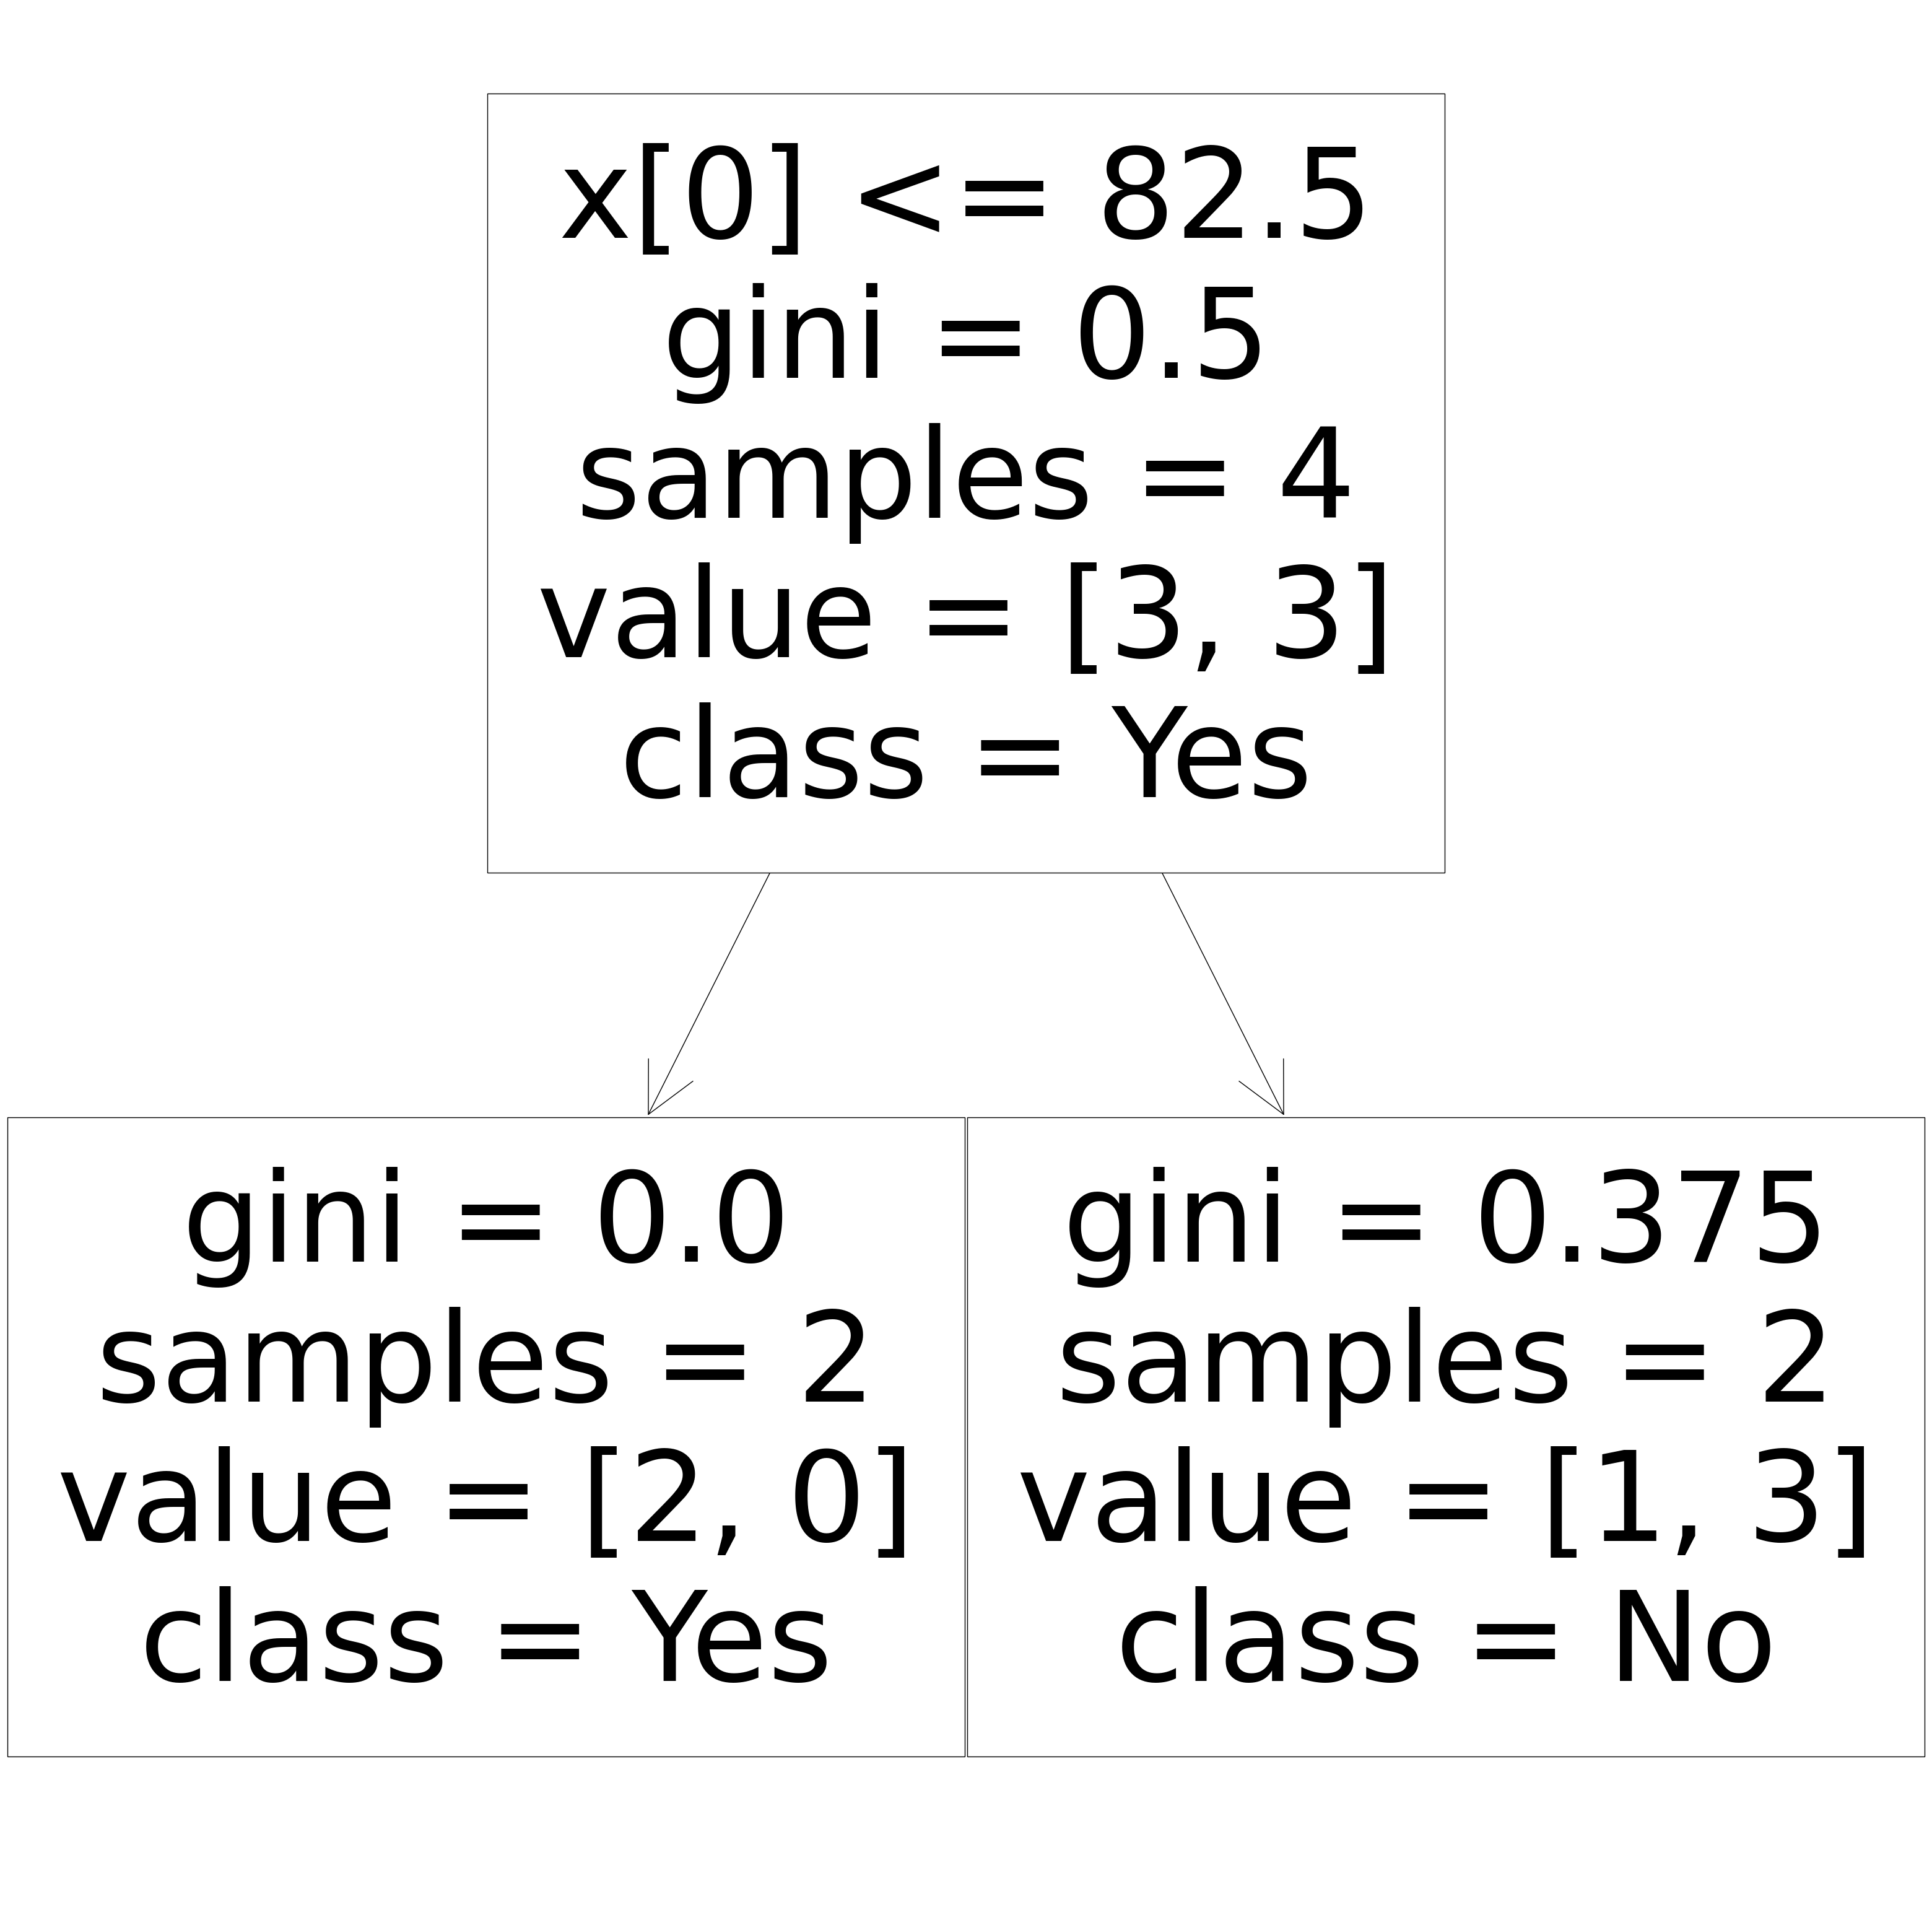

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[0],feature_names = None,class_names=['Yes','No'])